<a href="https://colab.research.google.com/github/holstbone/Neural-Networks-NLP-with-RNN/blob/main/A_3_NLP_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.3 Language Modeling with RNN:


## Project Nature and Content - Language Modeling with RNN:




Assignments 1 and 2 concerned neural networks, with a focus on computer vision. This assignment concerns natural language processing. You are asked to create deep neural networks for language processing and to analyze how various factors affect the fitting and ultimate test set performance of these networks.

Network Topologies. Think in terms of exploring alternative network structures/topologies, such as (1) dense versus recurrent neural networks, (2) dense versus one-dimensional convolutional neural networks, and/or (3) recurrent neural networks with and without long short-term memory. Explain your motivation for choosing each topology.

Among the network topologies (structures) you test in this assignment, there should be at least one network with the ability to take the sequence of words into consideration. A useful exercise is to compare processing requirements and predictive accuracy of dense versus recurrent neural networks with long short-term memory.

It is suggested that you work with a text classification problem using the AG’s news topic classification data set. Begin by fitting a fully connected (dense) network, evaluating alternative network structures in terms of their classification performance. Then pursue either a one-dimensional convolutional neural network (CNN) or a recurrent neural network (RNN or LSTM) to classify the same documents. Compare the performance of the word-sequence-enhanced model to the fully-connected model. Sequence models are discussed in chapter 6 of Chollet (2018).

Regarding data sets for natural language processing tasks (in particular, document classification), consider using https://www.tensorflow.org/datasets/catalog/ag_news_subset (Links to an external site.).  The goal is to compare several NLP algorithms for Reuters data – multi-class classification problem.  First, do EDA to understand how many topics (classes) are there in the data. Also understand how many documents are there in each class. In all the experiments, you may want to hold some parameters constants – eg. truncation of the documents to 128 tokens,  the batch size to 100, the number of epochs to 10, same optimizer, same loss function of cross entropy, so that the comparisons are fair.

### **EXPERIMENTS A - EDA:** 


For NLP projects, it is very important to do extensive EDA and do the preprocessing before defining models. These are the suggestions.

(a) Vocabulary Size: Tweak the vocabulary size, at least 3 levels.

(b) Editing the Vocabulary: Try unedited most frequent words, VS edit the list by deleting the most frequent words such as articles, ‘the’, ‘a’, etc.

(c) Output sequence length: Use the default VS set it to a fixed number



### **EXPERIMENTS B - RNN:** 


Try several experiments by tweaking (i) architecture (ii) Bidirectional/unidirectional & other hyper parameters, including regularization.




### **EXPERIMENTS C - LSTM:** 



Try several experiments by tweaking (i) architecture (ii) Bidirectional/unidirectional & other hyper parameters, including regularization.


### **EXPERIMENT D - CNN:**


Experiment D: 1D CNN




### **Result:** 


Create a table with the accuracy and loss for train/test/validation & process time for all the models

(Optional) Compare the test set performance and training time for models that begin with one-hot encoding versus models that begin with word embeddings from a public-domain source (pre-trained word embeddings). Methods for obtaining and working with word embeddings are provided under Modules / Technology Resources and in Chollet (2018) chapter 6.

### **Hyperparameter Settings.**

Within each network topology, evaluate alternative settings for hyperparameters. Understand that the tuning of hyperparameter settings may be best accomplished by dividing the available data into training, validation, and test sets.

For each network under study, report on its structure and hyperparameter settings. Report on the time it takes to train each network and the performance of that network in the test set.

### **Visualizations.** 



Employ visualizations to examine the performance of each network under study. Show training and validation set results (loss/cost and performance/accuracy) across epochs.



## **Management Problem.** 

Suppose you are asked by your current employer to develop a conversational agent or chatbot to assist customer support representatives. What advice would you give management about such development? What kinds of methods and models would be needed?  Would this be a substantial development project? Do you have any ideas about the information infrastructure needed to support conversational agents in a production environment? 

(Optional) Think about the possibilities for a generative language model using these same data. That is, drawing on methods described in chapter 8 of the Chollet (2018, pages 271-279), consider how you might develop a software robot to write movie reviews or news articles. Describe what you would do to build such a model.  If time permits, start with a few words and use a language model to generate subsequent words. Try various degrees of randomness (temperature, as described by Chollet) for the generated text sequences.



### **Resources for RNNs/LSTM NNs**

Use an RNN or LSTM network available online, such as those provided by Jason Brownlee on RNNs with Keras (Links to an external site.) as a base network. Use the data that is provided with the network. Perform the temporal series analysis as indicated in the online exercises. Appraise and evaluate your results. 

In particular, to the extent feasible, pay attention to what the hidden node activations are in response to the inputs. 

For reading in Reuters or IMDb from Keras and training a fully-connected (dense) network see

Modules / Technology Resources / Keras Tutorial Code (Paul Huynh)

For the tutorial, see the link
https://www.tensorflow.org/tutorials/text/text_classification_rnn

## **References** 


There are many excellent resources dealing with machine learning approaches to natural language processing. Here are two from MSDS 453 Natural Language Processing:

(1) Brownlee, J. 2019. Deep Learning for Natural Language Processing: Develop Deep Learning
Models for Natural Language in Python.  An electronic book with accompanying source code
available directly from the author at  https://machinelearningmastery.com/ (Links to an external site.)
(2) Lane, H., C. Howard, and H. M. Hapke 2019. Natural Language Processing in Action:  Understanding, Analyzing, and Generating Text in Python. Shelter Island, N.Y.: Manning. [ISBN-
13: 978-1617294631] Code available at  https://github.com/totalgood/nlpia

# Andy's Work Starts Here:

In [ ]:
!python --version

Python 3.7.11


## Import packages 

In [ ]:
import datetime
from time import time
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

In [ ]:
#tf.get_logger().setLevel('INFO')

In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [ ]:
print('The matplotlib version is {}.'.format(mpl.__version__))
print('The numpy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The keras version is {}.'.format(keras.__version__))
print('The tensorflow version is {}.'.format(tf.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The matplotlib version is 3.2.2.
The numpy version is 1.19.5.
The pandas version is 1.1.5.
The keras version is 2.5.0.
The tensorflow version is 2.5.0.
The seaborn version is 0.11.1.


### Analyze AG_NEWS_SUBSET Data <br>

AG is a collection of more than 1 million news articles. News articles have been gathered from more than 2000 news sources by ComeToMyHead in more than 1 year of activity. ComeToMyHead is an academic news search engine which has been running since July, 2004. The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc), information retrieval (ranking, search, etc), xml, data compression, data streaming, and any other non-commercial activity.<br> 

For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html<br> 


The AG's news topic classification dataset is constructed by choosing 4 largest classes (**World**, **Sports**, **Business**, and **Sci/Tech**) from the original corpus. Each class contains 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000 and testing 7,600.<br>

Homepage: https://arxiv.org/abs/1509.01626<br>

Source code: tfds.text.AGNewsSubset

Versions:

1.0.0 (default): No release notes.
Download size: 11.24 MiB

Dataset size: 35.79 MiB

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

### Create a Helper Function to Plot Graphs:

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

### Verify TensorFlow Version and Keras Version

In [ ]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.5.0


In [ ]:
print("Keras version: ", keras.__version__)

Keras version:  2.5.0


### Mount Google Drive to Colab Environment

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

###  TensorFlow Datasets Information<br>
<div class="alert alert-block alert-info">
    <b> ag_news_subset</b><br>
    See https://www.tensorflow.org/datasets/catalog/ag_news_subset
    </div>

Get all the words in the documents (as well as the number of words in each document) by using the encoder to get the indices associated with each token and then translating the indices to tokens. But first we need to get the "unpadded" new articles so that we can get their length.

In [ ]:
#register  ag_news_subset so that tfds.load doesn't generate a checksum (mismatch) error
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums --datasets=ag_news_subset

# https://www.tensorflow.org/datasets/splits
# The full `train` and `test` splits, interleaved together.
ri = tfds.core.ReadInstruction('train') + tfds.core.ReadInstruction('test')
dataset_all, info = tfds.load('ag_news_subset', with_info=True,  split=ri, as_supervised=True)

2021-08-01 18:17:35.054961: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
I0801 18:17:37.190376 139887658649472 download_and_prepare.py:200] Running download_and_prepare for dataset(s):
ag_news_subset
2021-08-01 18:17:37.197813: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
2021-08-01 18:17:37.272839: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
2021-08-01 18:17:37.341608: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
I0801 18:17:37.408648 139887658649472 dataset_info.py:434] Load pre-computed DatasetInfo (eg: splits, num examples,...) from GC

###  Exploratory Analysis AG News Subset

**Get information about the ag_news_subset dataset. We combined the training and test data for a total of 127,600 news articles.**

In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='ag_news_subset',
    version=1.0.0,
    description='AG is a collection of more than 1 million news articles.
News articles have been gathered from more than 2000  news sources by ComeToMyHead in more than 1 year of activity.
ComeToMyHead is an academic news search engine which has been running since July, 2004.
The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc),
information retrieval (ranking, search, etc), xml, data compression, data streaming,
and any other non-commercial activity.
For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html .

The AG's news topic classification dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the dataset above.
It is used as a text classification benchmark in the following paper:
Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advanc

In [ ]:
tfds.as_dataframe(dataset_all.take(10),info)

,description,label
0,"AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.",3 (Sci/Tech)
1,Reuters - Major League Baseball\Monday announced a decision on the appeal filed by Chicago Cubs\pitcher Kerry Wood regarding a suspension stemming from an\incident earlier this season.,1 (Sports)
2,"President Bush #39;s quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.",2 (Business)
3,"Britain will run out of leading scientists unless science education is improved, says Professor Colin Pillinger.",3 (Sci/Tech)
4,"London, England (Sports Network) - England midfielder Steven Gerrard injured his groin late in Thursday #39;s training session, but is hopeful he will be ready for Saturday #39;s World Cup qualifier against Austria.",1 (Sports)
5,TOKYO - Sony Corp. is banking on the \$3 billion deal to acquire Hollywood studio Metro-Goldwyn-Mayer Inc...,0 (World)
6,"Giant pandas may well prefer bamboo to laptops, but wireless technology is helping researchers in China in their efforts to protect the engandered animals living in the remote Wolong Nature Reserve.",3 (Sci/Tech)
7,"VILNIUS, Lithuania - Lithuania #39;s main parties formed an alliance to try to keep a Russian-born tycoon and his populist promises out of the government in Sunday #39;s second round of parliamentary elections in this Baltic country.",0 (World)
8,Witnesses in the trial of a US soldier charged with abusing prisoners at Abu Ghraib have told the court that the CIA sometimes directed abuse and orders were received from military command to toughen interrogations.,0 (World)
9,"Dan Olsen of Ponte Vedra Beach, Fla., shot a 7-under 65 Thursday to take a one-shot lead after two rounds of the PGA Tour qualifying tournament.",1 (Sports)


### Review Labels (Categories) 

In [ ]:
print(f'There are {info.features["label"].num_classes} classes in the dataset.')
print(f'The class names are {info.features["label"].names}')

There are 4 classes in the dataset.
The class names are ['World', 'Sports', 'Business', 'Sci/Tech']


In [ ]:
# classes dictionary
categories =dict(enumerate(info.features["label"].names))
categories

{0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

The 127,600 news articles are evenly distributed among the 4 categories

In [ ]:
train_categories = [categories[label] for label in dataset_all.map(lambda text, label: label).as_numpy_iterator()]
Counter(train_categories).most_common()

[('Sci/Tech', 31900), ('Sports', 31900), ('Business', 31900), ('World', 31900)]

We will use the tf.keras.layers.experimental.preprocessing.TextVectorization layer to transform each news article into a "list" of non-negative integers representing the tokens in the news article.

For the purpose of training our models each such "encoding" will have a fixed length corresponding to the news article(s) with the most tokens. Shorter articles will be right-padded with zeros in the encoding. Also to speed up the training process, we will set max_tokens = 1000 so that words not in the vabulary set of top 1000 most common tokes are encoded as 1. But first we set max_tokens = None (which is the default value) in order to get the vocabulary size of the corpus.


In [ ]:
%%time
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=None)
encoder.adapt(dataset_all.map(lambda text, label: text))
vocab = np.array(encoder.get_vocabulary())

Cause: could not parse the source code of <function <lambda> at 0x7f448a713200>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7f448a713200>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7f448a713200>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
CPU times: user 1min 37s, sys: 11.4 s, total: 1min 48s
Wall time: 1min 3s


In [ ]:
print(f"There are {len(vocab)} vocabulary words in the corpus.")

There are 95976 vocabulary words in the corpus.


There are 95976 vocabulary words in the corpus.

The .adapt method sets the layer's vocabulary. Here are the first 20 tokens. After the padding and unknown tokens they're sorted by frequency:

In [ ]:
vocab[:20]

array(['', '[UNK]', 'the', 'a', 'to', 'of', 'in', 'and', 'on', 'for',
       'that', '39s', 'with', 'its', 'as', 'at', 'is', 'said', 'by', 'it'],
      dtype='<U150')

Let us get the total number of words in the corpus and the sizes of the news articles

In [ ]:
%%time
doc_sizes = []
corpus = []
for example, _ in dataset_all.as_numpy_iterator():
  enc_example = encoder(example)
  doc_sizes.append(len(enc_example))
  corpus+=list(enc_example.numpy())

CPU times: user 11min 47s, sys: 1min 2s, total: 12min 49s
Wall time: 10min 21s


In [ ]:
print(f"There are {len(corpus)} words in the corpus of {len(doc_sizes)} news articles.")
print(f"Each news article has between {min(doc_sizes)} and {max(doc_sizes)} tokens in it.")

There are 3909695 words in the corpus of 127600 news articles.
Each news article has between 3 and 173 tokens in it.


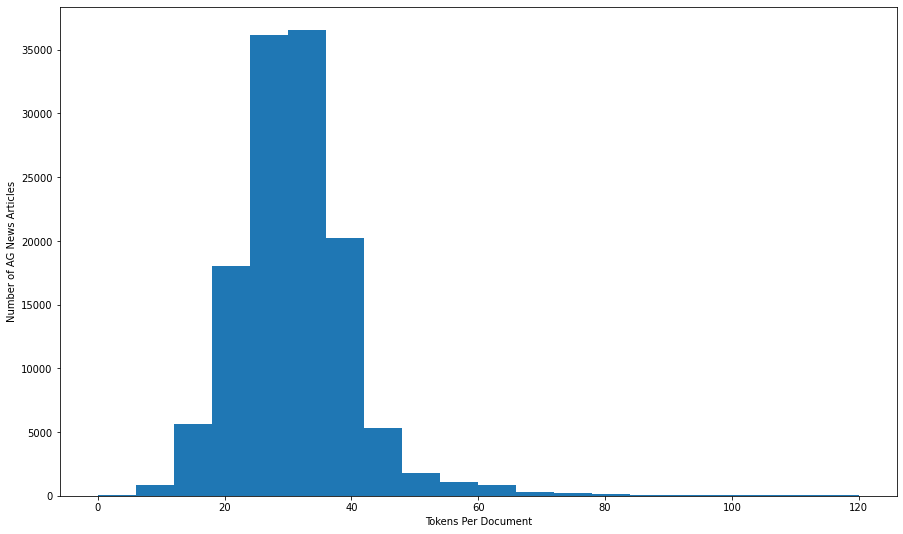

In [ ]:
plt.figure(figsize=(15,9))
plt.hist(doc_sizes, bins=20,range = (0,120))
plt.xlabel("Tokens Per Document")
plt.ylabel("Number of AG News Articles");

Encode the news articles using the top 1000 most common words in the corpus

In [ ]:
%%time
encoder_1000 = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=1000)
encoder_1000.adapt(dataset_all.map(lambda text, label: text))
vocab_1000 = np.array(encoder_1000.get_vocabulary());

Cause: could not parse the source code of <function <lambda> at 0x7f4470ae78c0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7f4470ae78c0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7f4470ae78c0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
CPU times: user 1min 37s, sys: 11.3 s, total: 1min 48s
Wall time: 1min 22s


The .adapt method sets the layer's vocabulary. Here are the first 20 tokens. After the padding and unknown tokens they're sorted by frequency:

In [ ]:
vocab_1000[:20]

array(['', '[UNK]', 'the', 'a', 'to', 'of', 'in', 'and', 'on', 'for',
       'that', '39s', 'with', 'its', 'as', 'at', 'is', 'said', 'by', 'it'],
      dtype='<U14')

In particular, 0 is use for padding, 1 for the unknown words, 2 for the common word, i.e. 'the', etc. Let us look at the same example we encoded previously using the encoder for all the vocabulary words. Note that there are now five 1's denoting words that are not in the top 1000 in frequency.

We encode the same example as before using the new encoder. Note that there are now 5 out of vocabulary words.

In [ ]:
example = "the dog ran after a red ball as it rolled by the hat on the ground."
encoder_1000(example)

<tf.Tensor: shape=(16,), dtype=int64, numpy=
array([  2,   1,   1,  29,   3, 232,   1,  14,  19,   1,  18,   2,   1,
         8,   2, 999])>

In [ ]:
for word in example.split():
  print(f'"{word}" is {"*not* " if word not in vocab_1000  else ""}in the vocabulary.')

"the" is in the vocabulary.
"dog" is *not* in the vocabulary.
"ran" is *not* in the vocabulary.
"after" is in the vocabulary.
"a" is in the vocabulary.
"red" is in the vocabulary.
"ball" is *not* in the vocabulary.
"as" is in the vocabulary.
"it" is in the vocabulary.
"rolled" is *not* in the vocabulary.
"by" is in the vocabulary.
"the" is in the vocabulary.
"hat" is *not* in the vocabulary.
"on" is in the vocabulary.
"the" is in the vocabulary.
"ground." is *not* in the vocabulary.


We want to determine the number of non-vocabulary words in each news articles (denoted by 1s in the encoding)

In [ ]:
%%time
doc1000_sizes = []
corpus1000 = []
count1000=0
useless = 0
# stop = 0
percents = []
for example, _ in dataset_all.as_numpy_iterator():
  # stop+=1
  # if stop > 5: break
  enc_example = encoder_1000(example)
  num_ones = tf.math.count_nonzero(enc_example==1).numpy()
  percent_ones = round(num_ones*100/len(enc_example))
  # print(f"{percent_ones}%")
  percents.append(percent_ones)

  s = set(list(enc_example.numpy()))
  if s == {1}: useless+=1

  doc1000_sizes.append(len(enc_example))
  corpus1000+=list(enc_example.numpy())

  count1000 += tf.math.count_nonzero(enc_example>1)

CPU times: user 13min 56s, sys: 1min 10s, total: 15min 7s
Wall time: 12min 20s


In [ ]:
print(f"Each news article has between {min(doc1000_sizes)} and {max(doc1000_sizes)} tokens in it.")

Each news article has between 3 and 173 tokens in it.


In [ ]:
Counter(percents).most_common(10)
np.unique(percents, return_counts=True) 

(array([  0,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  95,  97, 100]),
 array([  12,    5,   20,   29,   49,   71,  120,  137,  172,  274,  486,
         368,  682,  777,  828, 1346, 1376, 2123, 1610, 2863, 2687, 3018,
        3957, 3315, 4605, 3934, 4148, 5737, 4954, 5072, 6123, 6165, 3255,
        5095, 4596, 3438, 5880, 4205, 3109, 4063, 3555, 3030, 2904, 2294,
        1967, 1716, 2174,  368, 2486,  234, 1246,  747,  573,  547,  520,
         441,  348,  217,  250,  135,  234,   49,  131,  101,   11,  135,
          40,  

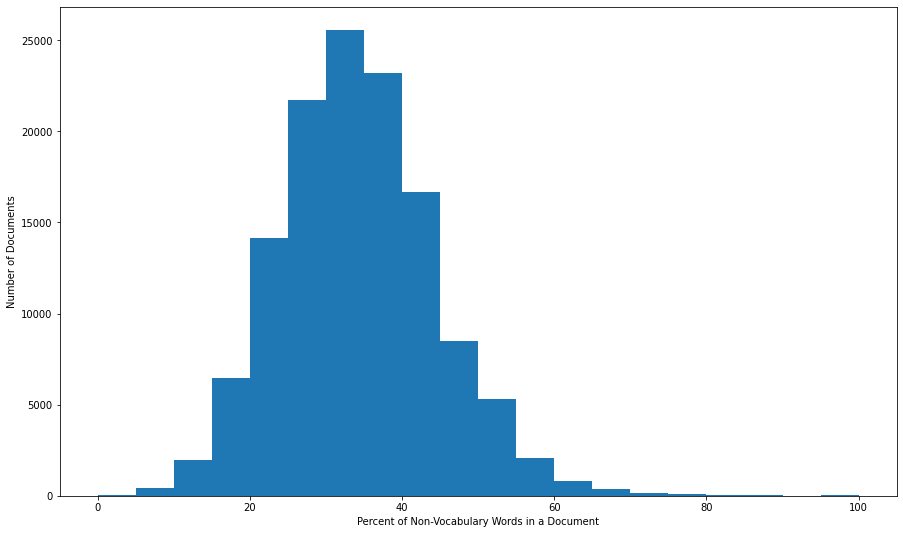

In [ ]:
plt.figure(figsize=(15,9))
plt.hist(percents, 20)
plt.ylabel('Number of Documents')
plt.xlabel('Percent of Non-Vocabulary Words in a Document');

In [ ]:
print(f"There are {count1000} top {len(vocab_1000)} vocabulary words in the corpus.")

There are 2602670 top 1000 vocabulary words in the corpus.


### Preprocessing Data Create Input Pipeline

In [ ]:
# register  ag_news_subset so that tfds.load doesn't generate a checksum (mismatch) error
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums --datasets=ag_news_subset

# Example Approaches to Split Data Set
# dataset, info = tfds.load('ag_news_subset', with_info=True,  split=['train[:]','test[:1000]', 'test[1000:]'],
dataset, info = tfds.load('ag_news_subset', with_info=True,  split=['train[:95%]','train[95%:]', 'test[:]'],
# dataset, info = tfds.load('ag_news_subset', with_info=True,  split=['train[:114000]','train[114000:]', 'test[:]'],
                          as_supervised=True)
train_dataset, validation_dataset, test_dataset = dataset
# train_dataset, test_dataset = dataset['train'],dataset['test']

2021-08-01 19:13:47.291027: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
I0801 19:13:49.292541 140373920380800 download_and_prepare.py:200] Running download_and_prepare for dataset(s):
ag_news_subset
I0801 19:13:49.293173 140373920380800 dataset_info.py:361] Load dataset info from /root/tensorflow_datasets/ag_news_subset/1.0.0
I0801 19:13:49.294399 140373920380800 download_and_prepare.py:138] download_and_prepare for dataset ag_news_subset/1.0.0...
I0801 19:13:49.294581 140373920380800 dataset_builder.py:299] Reusing dataset ag_news_subset (/root/tensorflow_datasets/ag_news_subset/1.0.0)
name: "ag_news_subset"
description: "AG is a collection of more than 1 million news articles.\nNews articles have been gathered from more than 2000  news sources by ComeToMyHead in more than 1 year of activity.\nComeToMyHead is an academic news search engine which has been running since July, 2004.\nThe dataset is provided by the 

In [ ]:
####  Dataset Splits (Training, Test, Validation)
#### .8934 Training, .0470 Test, .0596 Validation

In [ ]:
len(train_dataset),len(validation_dataset),len(test_dataset) 
# len(train_dataset),len(test_dataset) 

(114000, 6000, 7600)

### Review Distribution of Categorical Labels for the 114000 training data (news articles)

In [ ]:
from collections import Counter
train_categories = [categories[label] for label in train_dataset.map(lambda text, label: label).as_numpy_iterator()]
Counter(train_categories).most_common()

[('Business', 28531), ('Sports', 28495), ('World', 28491), ('Sci/Tech', 28483)]

Review Example with Interger Label(text, label pairs):

Review Example with Interger Label Encoded Classification(text, label pairs):

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('class: ', categories[label.numpy()])

text:  b'AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.'
class:  Sci/Tech


#### Preprocessing Shuffle Data for Training and Create Batches of `(text, label)` pairs:

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(2):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'MELBOURNE (Dow Jones)--Even with solid internal candidates, the board of Australia #39;s Telstra Corp. (TLS) could easily favor an outsider to replace Ziggy Switkowski.'
 b'UNITED NATIONSToo little has been done, too late, to end rape and killing in Sudan #39;s Darfur region, Nobel laureate and Holocaust survivor Elie Wiesel said yesterday and urged a more vigorous international response.'
 b'Indonesian police hunting those responsible for last week #39;s deadly bombing at the Australian Embassy in Jakarta said yesterday they had detained six people who might be linked to militants behind the attack.']

labels:  [2 0 0]
texts:  [b"AP - Oracle Corp.'s takeover tug-of-war with rival business software maker PeopleSoft Inc. intensified Tuesday as two shareholders who own nearly 20 percent of PeopleSoft's stock indicated they are prepared to line up on opposite sides of the battle lines."
 b' NEW YORK (Sports Network) - The New York Mets on Friday  claimed outfielder Ron Calloway

In [ ]:
for example, label in train_dataset.take(2):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', [categories[n] for n in label.numpy()[:3]])
  print()

texts:  [b'Rich Kaplan of Microsoft #39;s Security Business  amp; Technology Unit previewed the company #39;s Windows Rights Management Services Service Pack 1 beta at RSA Conference Europe 2004, and announced the '
 b'Tire maker Cooper Tire  amp; Rubber Co. has sold its Detroit-area auto supplier business -- known as Cooper-Standard Automotive -- to two New York private-equity firms.'
 b'Until the rain clouds moved in, I was watching the juxtaposition of two planets that appeared to be converging on the same spot in the early-morning eastern sky.']

labels:  ['Sci/Tech', 'Business', 'Sci/Tech']

texts:  [b'Israeli troops killed three Egyptian policemen mistaken for Palestinian militants along the Gaza-Egypt border early Thursday, in what the army called a "professional and operational" mishap.'
 b'TORONTO (CP) - North American stock markets appear poised for strong gains Friday in the fourth quarter #39;s first day of trading as investors recover from drug company Merck  amp; Co.'
 b"

# RELOAD

## Create the Text Encoder

The raw text loaded by `tfds` needs to be processed before it can be used in a model. The simplest way to process text for training is using the `experimental.preprocessing.TextVectorization` layer. This layer has many capabilities, but this tutorial sticks to the default behavior.

Create the layer, and pass the dataset's text to the layer's `.adapt` method:
The processing of each sample contains the following steps:

    standardize each sample (usually lowercasing + punctuation stripping)
    split each sample into substrings (usually words)
    recombine substrings into tokens (usually ngrams)
    index tokens (associate a unique int value with each token)
    transform each sample using this index, either into a vector of ints or a dense float vector.


The `.adapt` method sets the layer's vocabulary. Here are the first 20 tokens. After the padding and unknown tokens they're sorted by frequency: 

In [ ]:
VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
len(vocab)

1000

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'a', 'to', 'of', 'in', 'and', 'on', 'for',
       'that', '39s', 'with', 'its', 'as', 'at', 'is', 'said', 'by', 'it'],
      dtype='<U14')

Here are the 20 least frequent words.

In [ ]:
vocab[-20:]

array(['black', 'turn', 'build', 'countrys', 'advanced', 'whose',
       'crisis', 'create', '23', 'sources', 'body', 'militant', 'hope',
       'event', 'started', 'ready', 'jones', 'lawsuit', 'focus',
       'singapore'], dtype='<U14')

Once the vocabulary is set, the layer can encode text into indices. The tensors of indices are 0-padded to the longest sequence in the batch (unless you set a fixed `output_sequence_length`):<br>
Default Batch Size = 32

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[312, 333, 140,  79,   1,   1,   1,   9, 269, 544,   1,   2,   1,
          1, 229,  45,   6, 153,   2, 484, 324,   3,   1,   7,   1,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0],
       [599, 761, 243, 151, 279, 647,   1,   1,   9, 356, 884,  48,   6,
          2, 413, 221,  11,  39, 121,   5, 553,  14, 282,   1,  23, 361,
         46,   1, 480, 196,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0],
       [501, 137,   1,   1,  49,   5,   1, 122,  19,  26,  31,   1,   9,
          1,  69,  18,   1,   1,  84,   1,   3,   1,   1,  12,   2,  72,
          1,   1,   5, 501,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0

With the default settings, the process is not completely reversible. There are three main reasons for that:

1. The default value for `preprocessing.TextVectorization`'s `standardize` argument is `"lower_and_strip_punctuation"`.
2. The limited vocabulary size and lack of character-based fallback results in some unknown tokens.

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'Israeli troops killed three Egyptian policemen mistaken for Palestinian militants along the Gaza-Egypt border early Thursday, in what the army called a "professional and operational" mishap.'
Round-trip:  israeli troops killed three [UNK] [UNK] [UNK] for palestinian militants [UNK] the [UNK] [UNK] early thursday in what the army called a [UNK] and [UNK] [UNK]                                  

Original:  b'TORONTO (CP) - North American stock markets appear poised for strong gains Friday in the fourth quarter #39;s first day of trading as investors recover from drug company Merck  amp; Co.'
Round-trip:  toronto cp north american stock markets [UNK] [UNK] for strong gains friday in the fourth quarter 39s first day of trading as investors [UNK] from drug company [UNK] amp co                              

Original:  b"Defense technology developer Foster-Miller Inc. of Waltham says it will be acquired for \\$163 million by Britain's QinetiQ Group PLC, a public-private partners

# **EXPERIMENT 1 -  Single Layer Unidirectional RNN Output Dim 64**

---



## Create the model

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=64
                                # Use masking to handle the variable sequence lengths
                              ,mask_zero=True)
                              ,tf.keras.layers.SimpleRNN(64)
                              ,tf.keras.layers.Dense(128, activation='relu')
                              ,tf.keras.layers.Dense(num_classes,activation='softmax')   # num_classes = 4
])

## Compile Model 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4)
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy() # if we set from_logits=True we don not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

## Train the model

In [ ]:
start = time()

history = model.fit(train_dataset
                    ,epochs = 200
                    ,validation_data=validation_dataset
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
                    )

model_time = time() - start

Epoch 1/200
1782/1782 [==============================] - 170s 95ms/step - loss: 0.7353 - accuracy: 0.7028 - val_loss: 0.4916 - val_accuracy: 0.8293
Epoch 2/200
1782/1782 [==============================] - 173s 97ms/step - loss: 0.4654 - accuracy: 0.8343 - val_loss: 0.4592 - val_accuracy: 0.8357
Epoch 3/200
1782/1782 [==============================] - 172s 96ms/step - loss: 0.4294 - accuracy: 0.8476 - val_loss: 0.4227 - val_accuracy: 0.8477
Epoch 4/200
1782/1782 [==============================] - 171s 96ms/step - loss: 0.4118 - accuracy: 0.8536 - val_loss: 0.4254 - val_accuracy: 0.8480
Epoch 5/200
1782/1782 [==============================] - 169s 95ms/step - loss: 0.4021 - accuracy: 0.8566 - val_loss: 0.4066 - val_accuracy: 0.8550
Epoch 6/200
1782/1782 [==============================] - 168s 94ms/step - loss: 0.3954 - accuracy: 0.8588 - val_loss: 0.4083 - val_accuracy: 0.8508
Epoch 7/200
1782/1782 [==============================] - 169s 94ms/step - loss: 0.3903 - accuracy: 0.8598 - val_

In [ ]:
model_time

1721.4999461174011

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

119/119 [==============================] - 1s 11ms/step - loss: 0.4369 - accuracy: 0.8443
Test Loss: 0.43694087862968445
Test Accuracy: 0.8443421125411987


## Plotting Performance Metrics

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail(10).round(3)

,loss,accuracy,val_loss,val_accuracy
0,0.735,0.703,0.492,0.829
1,0.465,0.834,0.459,0.836
2,0.429,0.848,0.423,0.848
3,0.412,0.854,0.425,0.848
4,0.402,0.857,0.407,0.855
5,0.395,0.859,0.408,0.851
6,0.390,0.860,0.399,0.857
7,0.385,0.862,0.405,0.854
8,0.378,0.863,0.413,0.850


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

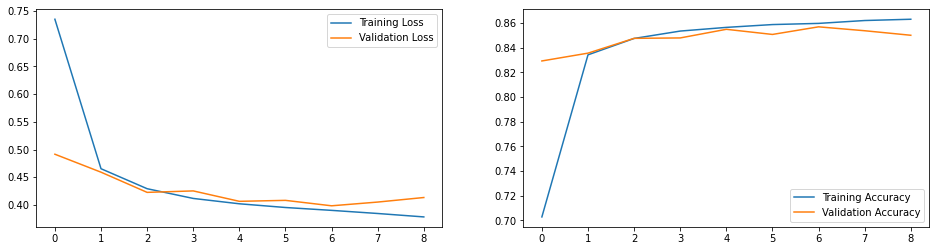

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion Matrix

In [ ]:
preds = model.predict(test_dataset)

In [ ]:
preds.shape

(7600, 4)

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:15]
                  ,columns = ['World','Sports','Business','Sci/Tech']).T
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
World,0.28%,99.92%,0.10%,2.10%,99.79%,1.01%,1.41%,62.50%,96.37%,2.64%,99.80%,0.88%,0.63%,95.34%,99.39%
Sports,99.68%,0.00%,0.00%,97.79%,0.02%,0.10%,98.28%,36.46%,0.49%,0.06%,0.00%,1.28%,0.01%,0.47%,0.01%
Business,0.03%,0.06%,1.67%,0.05%,0.09%,11.50%,0.06%,0.11%,0.87%,66.13%,0.16%,1.96%,98.78%,1.97%,0.37%
Sci/Tech,0.02%,0.02%,98.23%,0.06%,0.10%,87.38%,0.25%,0.92%,2.27%,31.17%,0.04%,95.88%,0.58%,2.22%,0.22%


## Model Architecture Summary


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_2 (TextVe (None, None)              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
Total params: 81,092
Trainable params: 81,092
Non-trainable params: 0
_________________________________________________________________


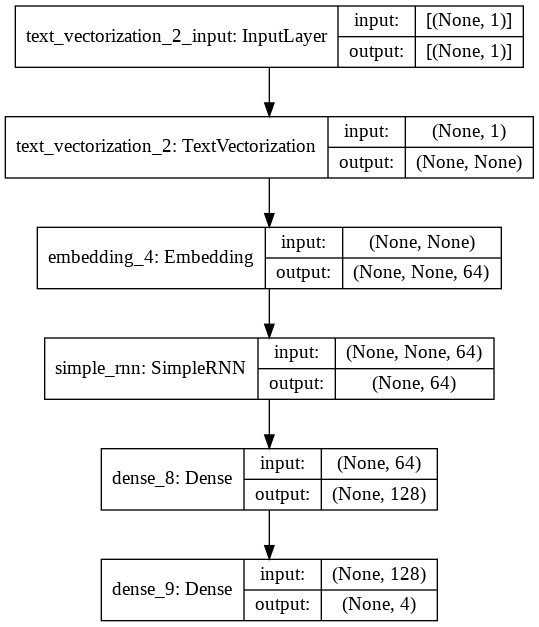

In [ ]:
keras.utils.plot_model(model, "BiDirectionalLSTM.png", show_shapes=True)

# **EXPERIMENT 2 - Single Layer Unidirectional RNN Output Dim 128**

## Create the model

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=128
                                # Use masking to handle the variable sequence lengths
                              ,mask_zero=True)
                              ,tf.keras.layers.SimpleRNN(128)
                              ,tf.keras.layers.Dense(128, activation='relu')
                              ,tf.keras.layers.Dense(num_classes,activation='softmax')   # num_classes = 4
])

## Compile Model 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4)
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy() # if we set from_logits=True we don not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

## Train the model

In [ ]:
start = time()

history = model.fit(train_dataset
                    ,epochs = 200
                    ,validation_data=validation_dataset
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
                    )

model_time = time() - start

Epoch 1/200
1782/1782 [==============================] - 177s 98ms/step - loss: 0.7227 - accuracy: 0.6945 - val_loss: 0.5097 - val_accuracy: 0.8192
Epoch 2/200
1782/1782 [==============================] - 175s 98ms/step - loss: 0.4549 - accuracy: 0.8367 - val_loss: 0.4315 - val_accuracy: 0.8478
Epoch 3/200
1782/1782 [==============================] - 174s 98ms/step - loss: 0.4149 - accuracy: 0.8524 - val_loss: 0.4082 - val_accuracy: 0.8553
Epoch 4/200
1782/1782 [==============================] - 176s 99ms/step - loss: 0.3964 - accuracy: 0.8582 - val_loss: 0.4092 - val_accuracy: 0.8522
Epoch 5/200
1782/1782 [==============================] - 176s 99ms/step - loss: 0.3841 - accuracy: 0.8618 - val_loss: 0.4097 - val_accuracy: 0.8545


In [ ]:
model_time

930.7552139759064

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

119/119 [==============================] - 1s 11ms/step - loss: 0.4200 - accuracy: 0.8496
Test Loss: 0.4199857711791992
Test Accuracy: 0.8496052622795105


## Plotting Performance Metrics

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail(10).round(3)

,loss,accuracy,val_loss,val_accuracy
0,0.723,0.694,0.510,0.819
1,0.455,0.837,0.431,0.848
2,0.415,0.852,0.408,0.855
3,0.396,0.858,0.409,0.852
4,0.384,0.862,0.410,0.854


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

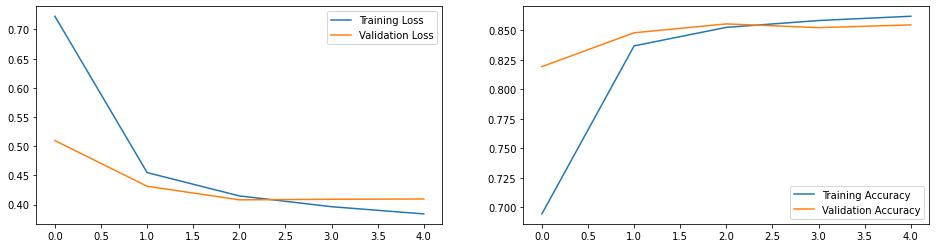

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Confusion Matrix

In [ ]:
preds = model.predict(test_dataset)

In [ ]:
preds.shape

(7600, 4)

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:15]
                  ,columns = ['World','Sports','Business','Sci/Tech']).T
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
World,0.15%,99.89%,0.05%,0.48%,99.48%,0.65%,0.78%,12.00%,87.16%,1.07%,99.91%,0.52%,0.55%,80.99%,99.23%
Sports,99.81%,0.00%,0.00%,99.40%,0.02%,0.22%,98.81%,85.75%,1.31%,0.08%,0.00%,1.40%,0.02%,1.83%,0.02%
Business,0.01%,0.08%,2.29%,0.06%,0.25%,22.76%,0.10%,0.51%,5.07%,92.63%,0.05%,1.96%,98.96%,4.00%,0.49%
Sci/Tech,0.02%,0.03%,97.66%,0.06%,0.25%,76.37%,0.32%,1.74%,6.46%,6.22%,0.04%,96.12%,0.47%,13.19%,0.26%


## Model Architecture Summary Single Layer Bidirectional RNN

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_2 (TextVe (None, None)              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, None, 128)         128000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 516       
Total params: 177,924
Trainable params: 177,924
Non-trainable params: 0
_________________________________________________________________


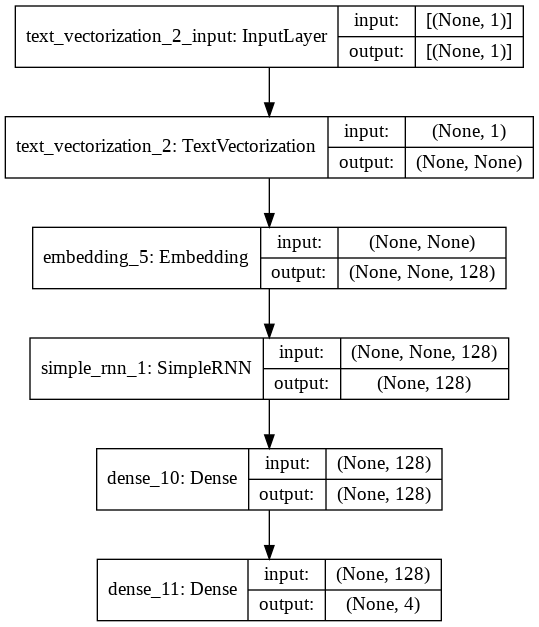

In [ ]:
keras.utils.plot_model(model, "BiDirectionalLSTM.png", show_shapes=True)

# **EXPERIMENT 3 -  Single Layer Unidirectional RNN Output Dim 256**

## Create the model

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=256
                                # Use masking to handle the variable sequence lengths
                              ,mask_zero=True)
                              ,tf.keras.layers.SimpleRNN(256)
                              ,tf.keras.layers.Dense(128, activation='relu')
                              ,tf.keras.layers.Dense(num_classes,activation='softmax')   # num_classes = 4
])

## Compile Model 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4)
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy() # if we set from_logits=True we don not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

## Train the model

In [ ]:
start = time()

history = model.fit(train_dataset
                    ,epochs = 200
                    ,validation_data=validation_dataset
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
                    )

model_time = time() - start

Epoch 1/200
1782/1782 [==============================] - 215s 120ms/step - loss: 0.6192 - accuracy: 0.7659 - val_loss: 0.4593 - val_accuracy: 0.8402
Epoch 2/200
1782/1782 [==============================] - 211s 118ms/step - loss: 0.4287 - accuracy: 0.8470 - val_loss: 0.4125 - val_accuracy: 0.8502
Epoch 3/200
1782/1782 [==============================] - 212s 119ms/step - loss: 0.4040 - accuracy: 0.8536 - val_loss: 0.4135 - val_accuracy: 0.8538
Epoch 4/200
1782/1782 [==============================] - 217s 122ms/step - loss: 0.3863 - accuracy: 0.8597 - val_loss: 0.4279 - val_accuracy: 0.8490
Epoch 5/200
1782/1782 [==============================] - 215s 120ms/step - loss: 0.3692 - accuracy: 0.8662 - val_loss: 0.4012 - val_accuracy: 0.8573
Epoch 6/200
1782/1782 [==============================] - 219s 123ms/step - loss: 0.3499 - accuracy: 0.8728 - val_loss: 0.4082 - val_accuracy: 0.8590
Epoch 7/200
1782/1782 [==============================] - 218s 122ms/step - loss: 0.3281 - accuracy: 0.8809

In [ ]:
model_time

1908.030846118927

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

119/119 [==============================] - 2s 14ms/step - loss: 0.4702 - accuracy: 0.8330
Test Loss: 0.4701511561870575
Test Accuracy: 0.8330262899398804


## Plotting Performance Metrics

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail(10).round(3)

,loss,accuracy,val_loss,val_accuracy
0,0.619,0.766,0.459,0.840
1,0.429,0.847,0.412,0.850
2,0.404,0.854,0.414,0.854
3,0.386,0.860,0.428,0.849
4,0.369,0.866,0.401,0.857
5,0.350,0.873,0.408,0.859
6,0.328,0.881,0.438,0.847
7,0.304,0.890,0.450,0.845


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

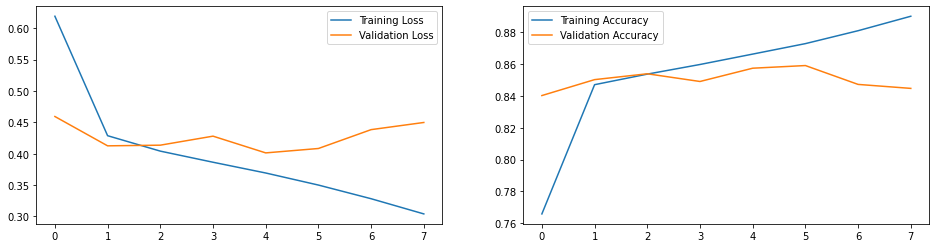

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Confusion Matrix

In [ ]:
preds = model.predict(test_dataset)

In [ ]:
preds.shape

(7600, 4)

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:15]
                  ,columns = ['World','Sports','Business','Sci/Tech']).T
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
World,0.29%,99.97%,0.02%,1.87%,99.49%,0.20%,0.85%,4.44%,96.48%,0.39%,99.98%,0.37%,0.17%,99.08%,99.94%
Sports,99.68%,0.00%,0.00%,98.00%,0.00%,0.05%,98.65%,95.31%,0.67%,0.00%,0.00%,1.49%,0.00%,0.06%,0.00%
Business,0.02%,0.01%,1.34%,0.07%,0.06%,16.68%,0.17%,0.02%,1.21%,93.96%,0.01%,0.11%,99.71%,0.25%,0.02%
Sci/Tech,0.01%,0.02%,98.64%,0.06%,0.45%,83.08%,0.34%,0.24%,1.63%,5.65%,0.01%,98.03%,0.12%,0.61%,0.04%


## Model Architecture Summary Single Layer Bidirectional RNN

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_2 (TextVe (None, None)              0         
_________________________________________________________________
embedding_6 (Embedding)      (None, None, 256)         256000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 516       
Total params: 420,740
Trainable params: 420,740
Non-trainable params: 0
_________________________________________________________________


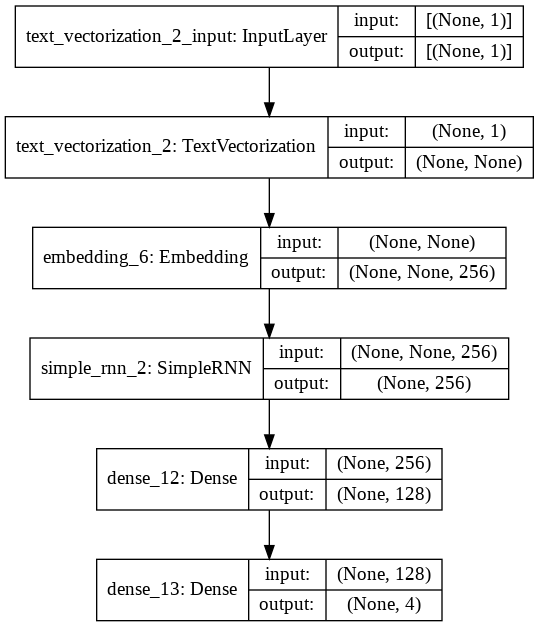

In [ ]:
keras.utils.plot_model(model, "BiDirectionalLSTM.png", show_shapes=True)

# **EXPERIMENT 4 - Single Layer Bidirectional RNN Output Dim 64**

## Create the model

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=64
                                # Use masking to handle the variable sequence lengths
                              ,mask_zero=True)
                              ,tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64))
                              ,tf.keras.layers.Dense(128, activation='relu')
                              ,tf.keras.layers.Dense(num_classes,activation='softmax')   # num_classes = 4
])

## Compile Model 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4)
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy() # if we set from_logits=True we don not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

## Train the model

In [ ]:
start = time()

history = model.fit(train_dataset
                    ,epochs = 200
                    ,validation_data=validation_dataset
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
                    )

model_time = time() - start

Epoch 1/200
1782/1782 [==============================] - 320s 178ms/step - loss: 0.7107 - accuracy: 0.7119 - val_loss: 0.4656 - val_accuracy: 0.8350
Epoch 2/200
1782/1782 [==============================] - 317s 178ms/step - loss: 0.4360 - accuracy: 0.8458 - val_loss: 0.4142 - val_accuracy: 0.8572
Epoch 3/200
1782/1782 [==============================] - 317s 178ms/step - loss: 0.4055 - accuracy: 0.8551 - val_loss: 0.4057 - val_accuracy: 0.8572
Epoch 4/200
1782/1782 [==============================] - 318s 178ms/step - loss: 0.3928 - accuracy: 0.8591 - val_loss: 0.3940 - val_accuracy: 0.8593
Epoch 5/200
1782/1782 [==============================] - 319s 179ms/step - loss: 0.3836 - accuracy: 0.8619 - val_loss: 0.3923 - val_accuracy: 0.8608
Epoch 6/200
1782/1782 [==============================] - 317s 178ms/step - loss: 0.3757 - accuracy: 0.8644 - val_loss: 0.3860 - val_accuracy: 0.8643
Epoch 7/200
1782/1782 [==============================] - 315s 176ms/step - loss: 0.3672 - accuracy: 0.8668

In [ ]:
model_time

2569.437309741974

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

119/119 [==============================] - 2s 17ms/step - loss: 0.4022 - accuracy: 0.8517
Test Loss: 0.4021598696708679
Test Accuracy: 0.8517104983329773


## Plotting Performance Metrics

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail(10).round(3)

,loss,accuracy,val_loss,val_accuracy
0,0.711,0.712,0.466,0.835
1,0.436,0.846,0.414,0.857
2,0.406,0.855,0.406,0.857
3,0.393,0.859,0.394,0.859
4,0.384,0.862,0.392,0.861
5,0.376,0.864,0.386,0.864
6,0.367,0.867,0.389,0.858
7,0.359,0.869,0.386,0.863


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

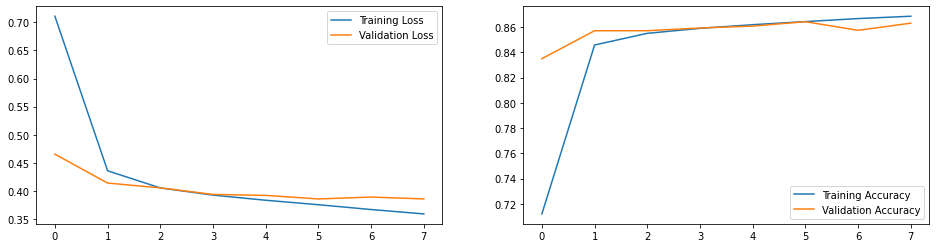

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Confusion Matrix

In [ ]:
preds = model.predict(test_dataset)

In [ ]:
preds.shape

(7600, 4)

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:15]
                  ,columns = ['World','Sports','Business','Sci/Tech']).T
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
World,0.06%,99.70%,0.25%,1.08%,99.93%,0.50%,0.75%,16.69%,89.81%,0.95%,99.92%,0.24%,0.26%,76.49%,99.87%
Sports,99.92%,0.00%,0.01%,98.82%,0.01%,0.10%,98.90%,82.19%,1.56%,0.04%,0.00%,1.17%,0.02%,4.39%,0.00%
Business,0.01%,0.27%,4.21%,0.06%,0.02%,10.00%,0.07%,0.12%,1.92%,69.77%,0.05%,1.19%,98.89%,4.62%,0.05%
Sci/Tech,0.01%,0.02%,95.53%,0.05%,0.04%,89.40%,0.28%,1.00%,6.71%,29.23%,0.03%,97.41%,0.83%,14.50%,0.08%


## Model Architecture Summary Single Layer Bidirectional RNN

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_2 (TextVe (None, None)              0         
_________________________________________________________________
embedding_7 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 516       
Total params: 97,540
Trainable params: 97,540
Non-trainable params: 0
_________________________________________________________________


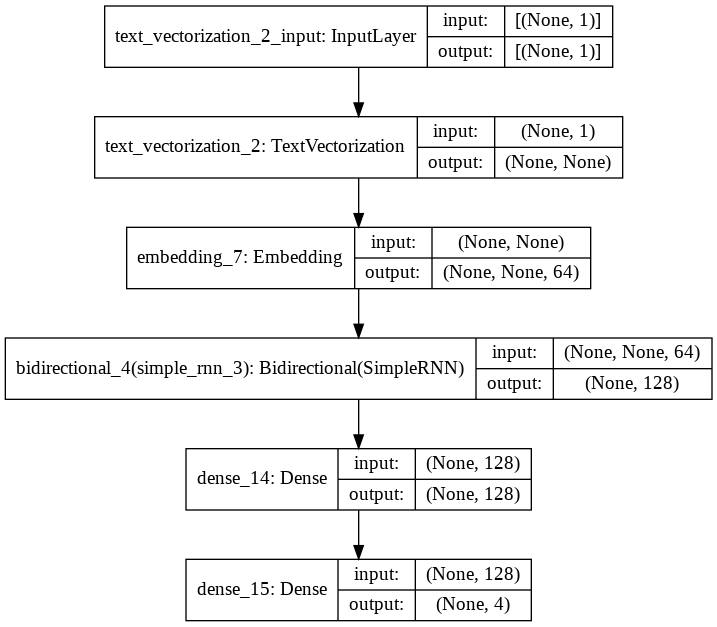

In [ ]:
keras.utils.plot_model(model, "BiDirectionalLSTM.png", show_shapes=True)

# **EXPERIMENT 5 - Single Layer Bidirectional RNN Output Dim 128**

## Create the model

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=128
                                # Use masking to handle the variable sequence lengths
                              ,mask_zero=True)
                              ,tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(128))
                              ,tf.keras.layers.Dense(128, activation='relu')
                              ,tf.keras.layers.Dense(num_classes,activation='softmax')   # num_classes = 4
])

## Compile Model 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4)
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy() # if we set from_logits=True we don not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

## Train the model

In [ ]:
start = time()

history = model.fit(train_dataset
                    ,epochs = 200
                    ,validation_data=validation_dataset
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
                    )

model_time = time() - start

Epoch 1/200
1782/1782 [==============================] - 320s 178ms/step - loss: 0.6385 - accuracy: 0.7502 - val_loss: 0.4637 - val_accuracy: 0.8348
Epoch 2/200
1782/1782 [==============================] - 318s 178ms/step - loss: 0.4398 - accuracy: 0.8412 - val_loss: 0.4338 - val_accuracy: 0.8427
Epoch 3/200
1782/1782 [==============================] - 323s 181ms/step - loss: 0.4057 - accuracy: 0.8540 - val_loss: 0.3973 - val_accuracy: 0.8583
Epoch 4/200
1782/1782 [==============================] - 319s 179ms/step - loss: 0.3846 - accuracy: 0.8605 - val_loss: 0.3952 - val_accuracy: 0.8600
Epoch 5/200
1782/1782 [==============================] - 319s 179ms/step - loss: 0.3688 - accuracy: 0.8666 - val_loss: 0.3964 - val_accuracy: 0.8583
Epoch 6/200
1782/1782 [==============================] - 321s 180ms/step - loss: 0.3521 - accuracy: 0.8722 - val_loss: 0.3974 - val_accuracy: 0.8605
Epoch 7/200
1782/1782 [==============================] - 319s 179ms/step - loss: 0.3357 - accuracy: 0.8778

In [ ]:
model_time

2632.433852672577

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

119/119 [==============================] - 2s 19ms/step - loss: 0.4229 - accuracy: 0.8497
Test Loss: 0.4228575825691223
Test Accuracy: 0.8497368693351746


## Plotting Performance Metrics

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail(10).round(3)

,loss,accuracy,val_loss,val_accuracy
0,0.639,0.750,0.464,0.835
1,0.440,0.841,0.434,0.843
2,0.406,0.854,0.397,0.858
3,0.385,0.860,0.395,0.860
4,0.369,0.867,0.396,0.858
5,0.352,0.872,0.397,0.860
6,0.336,0.878,0.400,0.860
7,0.318,0.884,0.405,0.854


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

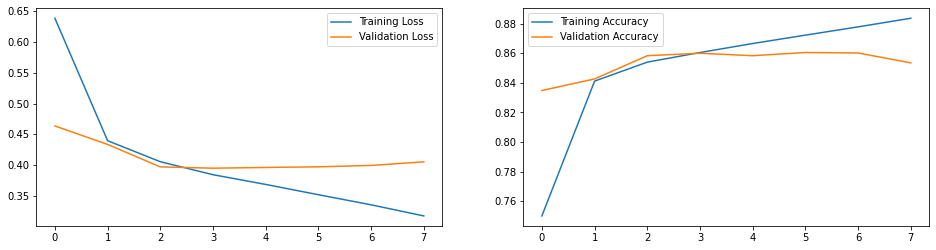

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Confusion Matrix

In [ ]:
preds = model.predict(test_dataset)

In [ ]:
preds.shape

(7600, 4)

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:15]
                  ,columns = ['World','Sports','Business','Sci/Tech']).T
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
World,0.01%,99.76%,0.17%,0.82%,99.28%,0.19%,1.03%,8.41%,95.77%,0.35%,99.06%,0.47%,0.11%,63.35%,99.81%
Sports,99.99%,0.00%,0.17%,99.06%,0.01%,0.27%,98.51%,90.59%,0.93%,0.05%,0.02%,0.65%,0.00%,5.04%,0.00%
Business,0.00%,0.23%,4.38%,0.07%,0.50%,25.80%,0.10%,0.05%,1.61%,96.55%,0.91%,0.89%,99.81%,9.81%,0.14%
Sci/Tech,0.00%,0.01%,95.28%,0.06%,0.21%,73.73%,0.36%,0.94%,1.70%,3.05%,0.02%,97.99%,0.08%,21.80%,0.05%


## Model Architecture Summary Single Layer Bidirectional RNN

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_2 (TextVe (None, None)              0         
_________________________________________________________________
embedding_8 (Embedding)      (None, None, 128)         128000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 516       
Total params: 227,204
Trainable params: 227,204
Non-trainable params: 0
_________________________________________________________________


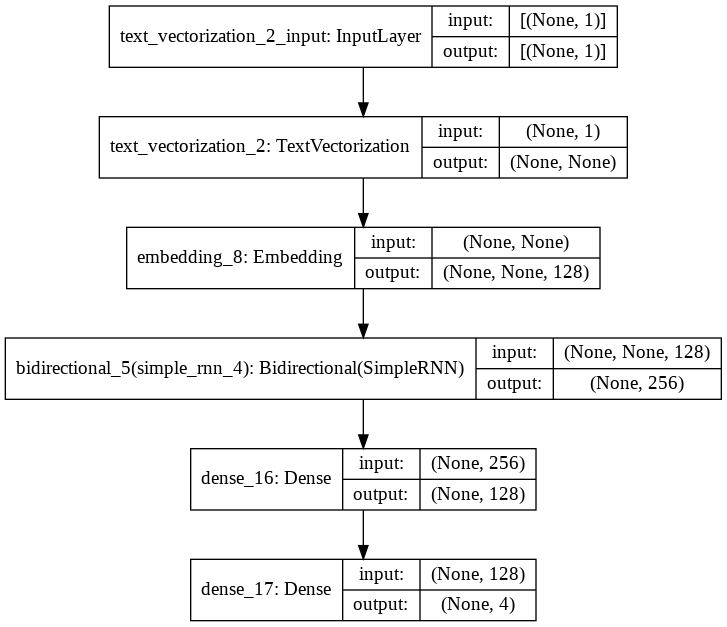

In [ ]:
keras.utils.plot_model(model, "BiDirectionalLSTM.png", show_shapes=True)

# **EXPERIMENT 6 - Single Layer Bidirectional RNN Output Dim 256**

## Create the model

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=256
                                # Use masking to handle the variable sequence lengths
                              ,mask_zero=True)
                              ,tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(256))
                              ,tf.keras.layers.Dense(128, activation='relu')
                              ,tf.keras.layers.Dense(num_classes,activation='softmax')   # num_classes = 4
])

## Compile Model 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4)
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy() # if we set from_logits=True we don not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

## Train the model

In [ ]:
start = time()

history = model.fit(train_dataset
                    ,epochs = 200
                    ,validation_data=validation_dataset
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
                    )

model_time = time() - start

Epoch 1/200
1782/1782 [==============================] - 391s 218ms/step - loss: 0.5945 - accuracy: 0.7729 - val_loss: 0.4633 - val_accuracy: 0.8382
Epoch 2/200
1782/1782 [==============================] - 382s 214ms/step - loss: 0.4142 - accuracy: 0.8509 - val_loss: 0.4158 - val_accuracy: 0.8505
Epoch 3/200
1782/1782 [==============================] - 380s 213ms/step - loss: 0.3873 - accuracy: 0.8595 - val_loss: 0.3882 - val_accuracy: 0.8618
Epoch 4/200
1782/1782 [==============================] - 381s 214ms/step - loss: 0.3638 - accuracy: 0.8672 - val_loss: 0.3997 - val_accuracy: 0.8572
Epoch 5/200
1782/1782 [==============================] - 381s 214ms/step - loss: 0.3380 - accuracy: 0.8759 - val_loss: 0.4077 - val_accuracy: 0.8552


In [ ]:
model_time

1970.9716033935547

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

119/119 [==============================] - 3s 22ms/step - loss: 0.4301 - accuracy: 0.8441
Test Loss: 0.43005648255348206
Test Accuracy: 0.8440789580345154


## Plotting Performance Metrics

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail(10).round(3)

,loss,accuracy,val_loss,val_accuracy
0,0.594,0.773,0.463,0.838
1,0.414,0.851,0.416,0.850
2,0.387,0.860,0.388,0.862
3,0.364,0.867,0.400,0.857
4,0.338,0.876,0.408,0.855


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

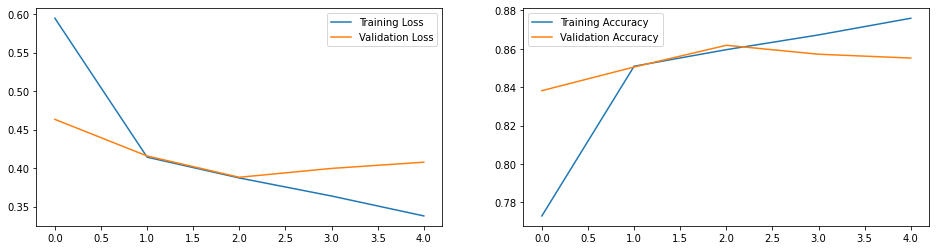

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Confusion Matrix

In [ ]:
preds = model.predict(test_dataset)

In [ ]:
preds.shape

(7600, 4)

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:15]
                  ,columns = ['World','Sports','Business','Sci/Tech']).T
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
World,0.01%,99.93%,0.23%,0.48%,99.94%,0.47%,0.25%,6.99%,93.95%,1.31%,99.96%,1.60%,0.45%,94.19%,99.94%
Sports,99.98%,0.00%,0.02%,99.39%,0.01%,0.07%,99.68%,91.99%,0.24%,0.05%,0.00%,1.05%,0.01%,1.00%,0.00%
Business,0.01%,0.02%,24.29%,0.09%,0.01%,15.09%,0.05%,0.03%,1.20%,59.51%,0.02%,1.64%,95.21%,1.44%,0.02%
Sci/Tech,0.00%,0.05%,75.45%,0.04%,0.04%,84.37%,0.02%,0.99%,4.61%,39.13%,0.01%,95.71%,4.33%,3.38%,0.04%


## Model Architecture Summary Single Layer Bidirectional RNN

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_2 (TextVe (None, None)              0         
_________________________________________________________________
embedding_9 (Embedding)      (None, None, 256)         256000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 516       
Total params: 584,836
Trainable params: 584,836
Non-trainable params: 0
_________________________________________________________________


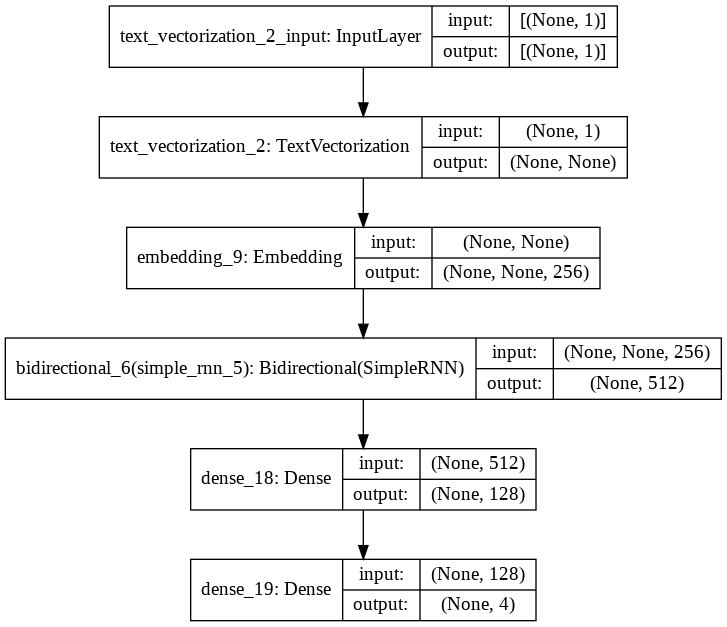

In [ ]:
keras.utils.plot_model(model, "BiDirectionalLSTM.png", show_shapes=True)

# **EXPERIMENT 7 - Single Layer Unidirectional LSTM Output Dim 64**

## Create the model

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=64
                                # Use masking to handle the variable sequence lengths
                              ,mask_zero=True)
                              ,tf.keras.layers.LSTM(64)
                              ,tf.keras.layers.Dense(128, activation='relu')
                              ,tf.keras.layers.Dense(num_classes,activation='softmax')   # num_classes = 4
])

## Compile Model 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4)
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy() # if we set from_logits=True we don not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

## Train the model

In [ ]:
start = time()

history = model.fit(train_dataset
                    ,epochs = 200
                    ,validation_data=validation_dataset
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
                    )

model_time = time() - start

Epoch 1/200
1782/1782 [==============================] - 30s 14ms/step - loss: 0.8095 - accuracy: 0.6711 - val_loss: 0.5204 - val_accuracy: 0.8277
Epoch 2/200
1782/1782 [==============================] - 24s 13ms/step - loss: 0.4837 - accuracy: 0.8320 - val_loss: 0.4443 - val_accuracy: 0.8480
Epoch 3/200
1782/1782 [==============================] - 23s 13ms/step - loss: 0.4301 - accuracy: 0.8490 - val_loss: 0.4167 - val_accuracy: 0.8548
Epoch 4/200
1782/1782 [==============================] - 24s 13ms/step - loss: 0.4077 - accuracy: 0.8561 - val_loss: 0.4010 - val_accuracy: 0.8588
Epoch 5/200
1782/1782 [==============================] - 23s 13ms/step - loss: 0.3973 - accuracy: 0.8589 - val_loss: 0.3961 - val_accuracy: 0.8607
Epoch 6/200
1782/1782 [==============================] - 24s 13ms/step - loss: 0.3907 - accuracy: 0.8598 - val_loss: 0.3899 - val_accuracy: 0.8602
Epoch 7/200
1782/1782 [==============================] - 24s 13ms/step - loss: 0.3862 - accuracy: 0.8612 - val_loss: 0

In [ ]:
model_time

323.8218774795532

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

119/119 [==============================] - 4s 6ms/step - loss: 0.4060 - accuracy: 0.8530
Test Loss: 0.4060352146625519
Test Accuracy: 0.8530263304710388


## Plotting Performance Metrics

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail(10).round(3)

,loss,accuracy,val_loss,val_accuracy
0,0.809,0.671,0.520,0.828
1,0.484,0.832,0.444,0.848
2,0.430,0.849,0.417,0.855
3,0.408,0.856,0.401,0.859
4,0.397,0.859,0.396,0.861
5,0.391,0.860,0.390,0.860
6,0.386,0.861,0.387,0.862
7,0.383,0.862,0.389,0.859
8,0.380,0.863,0.386,0.860


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

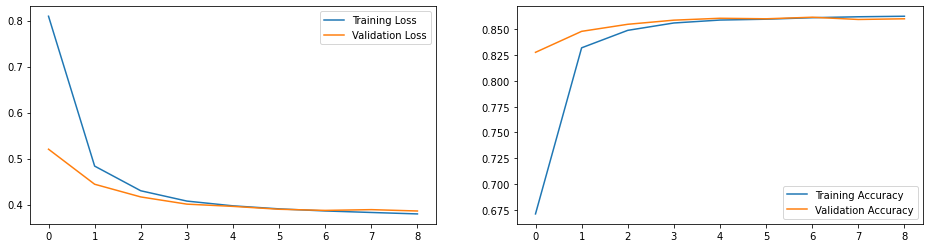

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Confusion Matrix

In [ ]:
preds = model.predict(test_dataset)

In [ ]:
preds.shape

(7600, 4)

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:15]
                  ,columns = ['World','Sports','Business','Sci/Tech']).T
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
World,1.27%,99.92%,0.07%,2.53%,99.63%,0.63%,1.60%,29.56%,95.12%,2.57%,99.92%,0.39%,1.28%,93.00%,99.54%
Sports,98.64%,0.00%,0.01%,97.24%,0.02%,0.23%,98.07%,68.06%,0.46%,0.06%,0.00%,0.36%,0.04%,0.90%,0.00%
Business,0.05%,0.06%,3.66%,0.14%,0.16%,16.87%,0.08%,0.20%,1.28%,83.06%,0.05%,1.56%,98.07%,2.44%,0.28%
Sci/Tech,0.05%,0.03%,96.27%,0.09%,0.19%,82.27%,0.24%,2.18%,3.14%,14.31%,0.02%,97.68%,0.61%,3.67%,0.18%


## Model Architecture Summary Single Layer Bidirectional RNN

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_2 (TextVe (None, None)              0         
_________________________________________________________________
embedding_10 (Embedding)     (None, None, 64)          64000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_20 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 516       
Total params: 105,860
Trainable params: 105,860
Non-trainable params: 0
_________________________________________________________________


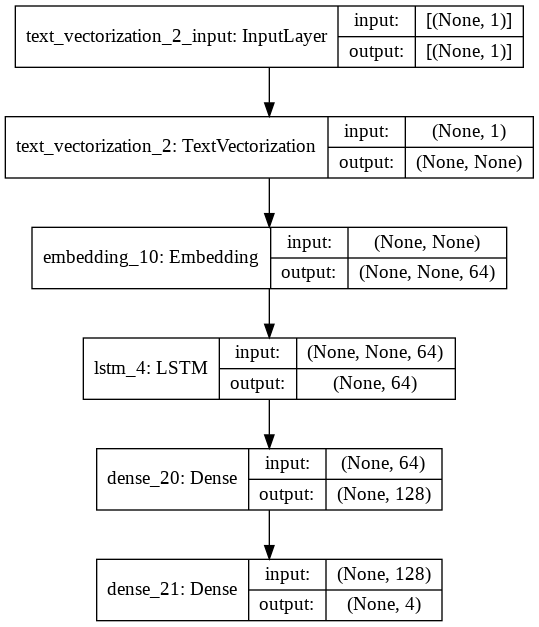

In [ ]:
keras.utils.plot_model(model, "BiDirectionalLSTM.png", show_shapes=True)

# **EXPERIMENT 8 - Single Layer Unidirectional LSTM Output Dim 128**

## Create the model

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=128
                                # Use masking to handle the variable sequence lengths
                              ,mask_zero=True)
                              ,tf.keras.layers.LSTM(128)
                              ,tf.keras.layers.Dense(128, activation='relu')
                              ,tf.keras.layers.Dense(num_classes,activation='softmax')   # num_classes = 4
])

## Compile Model 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4)
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy() # if we set from_logits=True we don not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

## Train the model

In [ ]:
start = time()

history = model.fit(train_dataset
                    ,epochs = 200
                    ,validation_data=validation_dataset
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
                    )

model_time = time() - start

Epoch 1/200
1782/1782 [==============================] - 33s 16ms/step - loss: 0.6765 - accuracy: 0.7456 - val_loss: 0.4714 - val_accuracy: 0.8378
Epoch 2/200
1782/1782 [==============================] - 26s 14ms/step - loss: 0.4581 - accuracy: 0.8364 - val_loss: 0.4559 - val_accuracy: 0.8373
Epoch 3/200
1782/1782 [==============================] - 26s 15ms/step - loss: 0.4427 - accuracy: 0.8408 - val_loss: 0.4371 - val_accuracy: 0.8472
Epoch 4/200
1782/1782 [==============================] - 27s 15ms/step - loss: 0.4288 - accuracy: 0.8464 - val_loss: 0.4169 - val_accuracy: 0.8528
Epoch 5/200
1782/1782 [==============================] - 26s 14ms/step - loss: 0.4070 - accuracy: 0.8543 - val_loss: 0.4042 - val_accuracy: 0.8568
Epoch 6/200
1782/1782 [==============================] - 27s 15ms/step - loss: 0.3953 - accuracy: 0.8576 - val_loss: 0.3989 - val_accuracy: 0.8578
Epoch 7/200
1782/1782 [==============================] - 26s 15ms/step - loss: 0.3873 - accuracy: 0.8603 - val_loss: 0

In [ ]:
model_time

345.0410921573639

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

119/119 [==============================] - 1s 7ms/step - loss: 0.4109 - accuracy: 0.8471
Test Loss: 0.41091620922088623
Test Accuracy: 0.8471052646636963


## Plotting Performance Metrics

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail(10).round(3)

,loss,accuracy,val_loss,val_accuracy
0,0.676,0.746,0.471,0.838
1,0.458,0.836,0.456,0.837
2,0.443,0.841,0.437,0.847
3,0.429,0.846,0.417,0.853
4,0.407,0.854,0.404,0.857
5,0.395,0.858,0.399,0.858
6,0.387,0.860,0.392,0.860
7,0.382,0.862,0.391,0.857
8,0.377,0.863,0.388,0.859


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

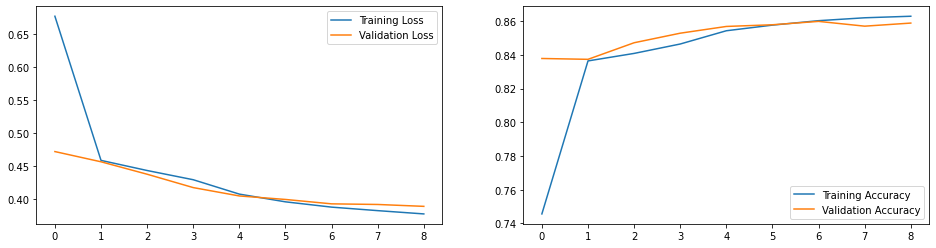

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Confusion Matrix

In [ ]:
preds = model.predict(test_dataset)

In [ ]:
preds.shape

(7600, 4)

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:15]
                  ,columns = ['World','Sports','Business','Sci/Tech']).T
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
World,0.13%,99.92%,0.12%,1.50%,99.58%,0.87%,1.50%,42.30%,93.81%,3.79%,99.93%,0.73%,1.04%,93.58%,99.48%
Sports,99.83%,0.00%,0.00%,98.20%,0.01%,0.14%,97.98%,53.48%,0.48%,0.22%,0.00%,0.22%,0.03%,0.69%,0.01%
Business,0.02%,0.06%,2.81%,0.12%,0.16%,11.49%,0.13%,0.45%,1.13%,75.87%,0.04%,0.88%,98.23%,1.88%,0.25%
Sci/Tech,0.02%,0.02%,97.06%,0.18%,0.25%,87.50%,0.39%,3.76%,4.57%,20.12%,0.02%,98.17%,0.70%,3.85%,0.26%


## Model Architecture Summary Single Layer Bidirectional RNN

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_2 (TextVe (None, None)              0         
_________________________________________________________________
embedding_11 (Embedding)     (None, None, 128)         128000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 516       
Total params: 276,612
Trainable params: 276,612
Non-trainable params: 0
_________________________________________________________________


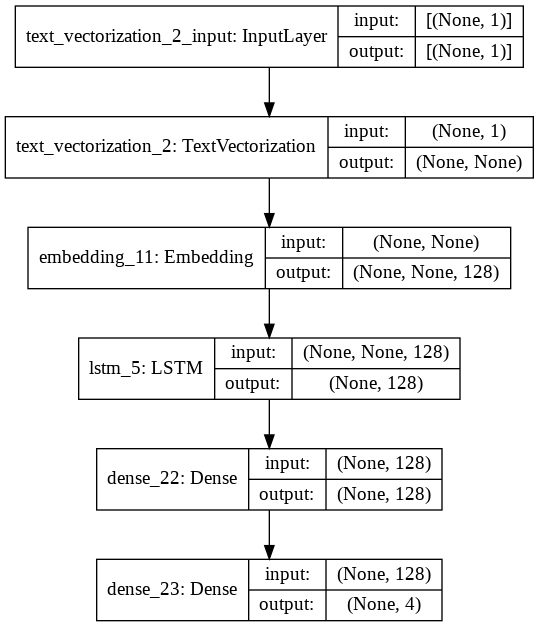

In [ ]:
keras.utils.plot_model(model, "BiDirectionalLSTM.png", show_shapes=True)

# **EXPERIMENT 9 - Single Layer Unidirectional LSTM Output Dim 256**

## Create the model

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=256
                                # Use masking to handle the variable sequence lengths
                              ,mask_zero=True)
                              ,tf.keras.layers.LSTM(256)
                              ,tf.keras.layers.Dense(128, activation='relu')
                              ,tf.keras.layers.Dense(num_classes,activation='softmax')   # num_classes = 4
])

## Compile Model 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4)
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy() # if we set from_logits=True we don not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

## Train the model

In [ ]:
start = time()

history = model.fit(train_dataset
                    ,epochs = 200
                    ,validation_data=validation_dataset
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
                    )

model_time = time() - start

Epoch 1/200
1782/1782 [==============================] - 41s 20ms/step - loss: 0.6340 - accuracy: 0.7557 - val_loss: 0.4665 - val_accuracy: 0.8345
Epoch 2/200
1782/1782 [==============================] - 35s 19ms/step - loss: 0.4322 - accuracy: 0.8460 - val_loss: 0.4166 - val_accuracy: 0.8502
Epoch 3/200
1782/1782 [==============================] - 34s 19ms/step - loss: 0.4054 - accuracy: 0.8538 - val_loss: 0.4068 - val_accuracy: 0.8555
Epoch 4/200
1782/1782 [==============================] - 33s 18ms/step - loss: 0.3950 - accuracy: 0.8576 - val_loss: 0.4064 - val_accuracy: 0.8588
Epoch 5/200
1782/1782 [==============================] - 34s 19ms/step - loss: 0.3869 - accuracy: 0.8599 - val_loss: 0.3884 - val_accuracy: 0.8598
Epoch 6/200
1782/1782 [==============================] - 33s 18ms/step - loss: 0.3811 - accuracy: 0.8611 - val_loss: 0.3867 - val_accuracy: 0.8605
Epoch 7/200
1782/1782 [==============================] - 35s 20ms/step - loss: 0.3742 - accuracy: 0.8635 - val_loss: 0

In [ ]:
model_time

302.4975075721741

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

119/119 [==============================] - 1s 8ms/step - loss: 0.3993 - accuracy: 0.8526
Test Loss: 0.399338036775589
Test Accuracy: 0.8526315689086914


## Plotting Performance Metrics

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail(10).round(3)

,loss,accuracy,val_loss,val_accuracy
0,0.634,0.756,0.466,0.835
1,0.432,0.846,0.417,0.850
2,0.405,0.854,0.407,0.855
3,0.395,0.858,0.406,0.859
4,0.387,0.860,0.388,0.860
5,0.381,0.861,0.387,0.860
6,0.374,0.863,0.389,0.859
7,0.368,0.865,0.379,0.860


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

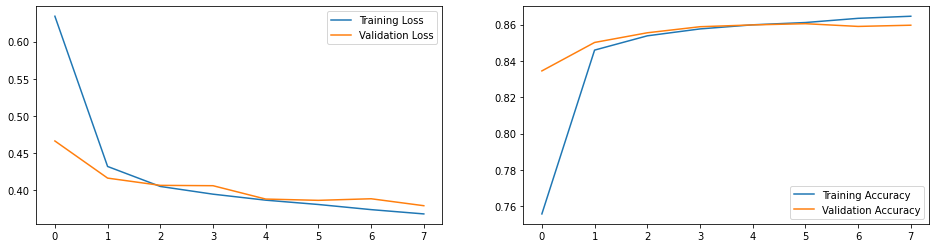

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Confusion Matrix

In [ ]:
preds = model.predict(test_dataset)

In [ ]:
preds.shape

(7600, 4)

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:15]
                  ,columns = ['World','Sports','Business','Sci/Tech']).T
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
World,0.14%,99.96%,0.12%,3.29%,99.79%,0.48%,2.37%,26.93%,96.01%,1.70%,99.94%,0.45%,0.47%,93.92%,99.85%
Sports,99.84%,0.00%,0.00%,96.44%,0.03%,0.12%,96.99%,69.91%,0.42%,0.07%,0.00%,0.18%,0.01%,0.68%,0.01%
Business,0.01%,0.02%,3.33%,0.10%,0.08%,11.38%,0.11%,0.16%,0.52%,84.27%,0.04%,1.24%,99.14%,1.17%,0.07%
Sci/Tech,0.01%,0.01%,96.54%,0.18%,0.10%,88.03%,0.53%,3.00%,3.05%,13.97%,0.02%,98.13%,0.38%,4.23%,0.06%


## Model Architecture Summary Single Layer Bidirectional RNN

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_2 (TextVe (None, None)              0         
_________________________________________________________________
embedding_12 (Embedding)     (None, None, 256)         256000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 516       
Total params: 814,724
Trainable params: 814,724
Non-trainable params: 0
_________________________________________________________________


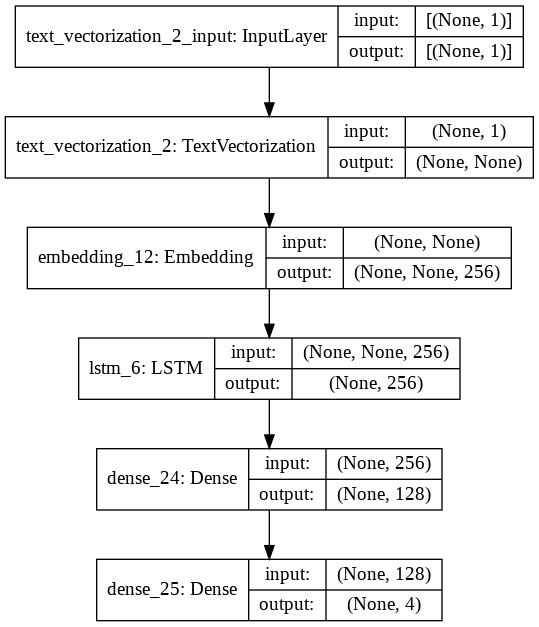

In [ ]:
keras.utils.plot_model(model, "BiDirectionalLSTM.png", show_shapes=True)

Check out other existing recurrent layers such as [GRU layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU).

If you're interestied in building custom RNNs, see the [Keras RNN Guide](../../guide/keras/rnn.ipynb).


### Use t-Distributed Stochastic Neighbor Embedding (**t-SNE**)  to reduce the (activation) features from 128 (= num of hidden nodes) to 2

`t-Distributed Stochastic Neighbor Embedding` (**t-SNE**) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. This time we only use the first 10,000 training images (N=10000) since the technique is computationally expensive.

See http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

<div class="alert alert-block alert-info">
    <b>Correlation matrix that measures the linear relationships</b><br> 
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
    </div>

In [ ]:
activation_df.shape

In [ ]:
N=55000
activation_df_subset = activation_df.iloc[:N].copy()
activation_df_subset.shape

In [ ]:
features = [*activation_data][1:] # ['act_val_0', 'act_val_1',...]
data_subset = activation_df_subset[features].values
data_subset.shape

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

In [ ]:
tsne_results = (tsne_results - tsne_results.min()) / (tsne_results.max() - tsne_results.min())

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

In [ ]:
x_train = x_train[5000:]
x_train.shape

In [ ]:
y_train = y_train[5000:]
y_train.shape

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
# plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1], c=y_train, s=10, cmap=cmap)

image_positions = np.array([[1., 1.]])
for index, position in enumerate(tsne_results):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(x_train[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_train[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.title('Experiment 4: Visualizing Activation Values of 128 node model using t-DSNE')
plt.savefig('Experiment_4')
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html /content/Holst_Assignment_A_3_NLP_Part_1.ipynb

[NbConvertApp] Converting notebook /content/Holst_Assignment_A_3_NLP_Part_1.ipynb to html
[NbConvertApp] Writing 1682177 bytes to /content/Holst_Assignment_A_3_NLP_Part_1.html
